## Comprehensive Guide to Classification Models in Scikit-Learn
- Classification is a supervised learning technique where the goal is to predict the categorical class labels of new instances based on past observations. It involves training a model on a labeled dataset, where the target variable is categorical. Common applications include spam detection, image recognition, and medical diagnosis.

## Scikit-Learn Classification Models

### 1. Logistic Regression
- Logistic Regression is a linear model used for binary classification problems. It models the probability that a given input belongs to a particular class.

- Advantages:

    - Simplicity and Interpretability: Logistic regression is easy to implement and interpret. It provides a clear probabilistic framework for binary classification problems.
    - Efficiency: It is computationally efficient and works well with large datasets.
    - No Need for Feature Scaling: Logistic regression does not require feature scaling, making it simpler to use.
- Disadvantages:

    - Linear Decision Boundary: It assumes a linear relationship between the independent variables and the log-odds of the dependent variable, which may not always be true.
    - Overfitting with High-Dimensional Data: Logistic regression can overfit when the number of observations is less than the number of features.
    - Not Suitable for Non-Linear Problems: It cannot handle non-linear relationships unless features are transformed

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score, classification_report 

wine = load_wine()
X = wine.data
y = wine.target
class_names = wine.target_names 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
for i in range(len(y_pred)):
    print(f"True label: {class_names[y_test[i]]}, Predict: {class_names[y_pred[i]]}")
    if i == 10:
        break

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        15

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

True label: class_0, Predict: class_0
True label: class_0, Predict: class_0
True label: class_2, Predict: class_2
True label: class_0, Predict: class_0
True label: class_1, Predict: class_1
True label: class_0, Predict: class_0
True label: class_1, Predict: class_1
True label: class_2, Predict: class_2
True label: class_1, Predict: class_1
True label: class_2, Predict: class_2
True label: class_0, Predict: class_0


### 2. K-Nearest Neighbors (KNN)
- In the k-Nearest Neighbours algorithm k is just a number that tells the algorithm how many nearby points or neighbors to look at when it makes a decision.

- Example: Imagine you're deciding which fruit it is based on its shape and size. You compare it to fruits you already know.

    - If k = 3, the algorithm looks at the 3 closest fruits to the new one.
    - If 2 of those 3 fruits are apples and 1 is a banana, the algorithm says the new fruit is an apple because most of its neighbors are apples.

- How to choose the value of k for KNN Algorithm?
    - The value of k in KNN decides how many neighbors the algorithm looks at when making a prediction.
    - Choosing the right k is important for good results.
    - If the data has lots of noise or outliers, using a larger k can make the predictions more stable.
    - But if k is too large the model may become too simple and miss important patterns and this is called underfitting.
    - So k should be picked carefully based on the data.

- Statistical Methods for Selecting k
    - Cross-Validation: Cross-Validation is a good way to find the best value of k is by using k-fold cross-validation. This means dividing the dataset into k parts. The model is trained on some of these parts and tested on the remaining ones. This process is repeated for each part. The k value that gives the highest average accuracy during these tests is usually the best one to use.
    - Elbow Method: In Elbow Method we draw a graph showing the error rate or accuracy for different k values. As k increases the error usually drops at first. But after a certain point error stops decreasing quickly. The point where the curve changes direction and looks like an "elbow" is usually the best choice for k.
Odd Values for k: It’s a good idea to use an odd number for k especially in classification problems. This helps avoid ties when deciding which class is the most common among the neighbors.

- Advantages:

    - No Training Period: KNN is a lazy learner, meaning it does not require a training phase, which makes it fast to implement.
    - Flexibility: It can handle multi-class classification problems and is easy to understand and implement.
    - Adaptability: New data can be added seamlessly without retraining the model.
- Disadvantages:

    - Computationally Intensive: KNN can be slow for large datasets as it requires computing the distance between the new point and all existing points.
    - Sensitive to Noise and Outliers: KNN is sensitive to noisy data and outliers, which can affect its performance.
    - Feature Scaling Required: It requires feature scaling to ensure that all features contribute equally to the distance calculations

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.6949152542372882
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.70      0.67      0.68        24
           2       0.50      0.53      0.52        15

    accuracy                           0.69        59
   macro avg       0.68      0.68      0.68        59
weighted avg       0.70      0.69      0.70        59



### 4. Decision Trees
- A Decision Tree helps us make decisions by showing different options and how they are related. It has a tree-like structure that starts with one main question called the root node which represents the entire dataset. From there, the tree branches out into different possibilities based on features in the data.
    - Root Node: Starting point representing the whole dataset.
    - Branches: Lines connecting nodes showing the flow from one decision to another.
    - Internal Nodes: Points where decisions are made based on data features.
    - Leaf Nodes: End points of the tree where the final decision or prediction is made.

- Splitting Criteria in Decision Trees
    - In a Decision Tree, the process of splitting data at each node is important. The splitting criteria finds the best feature to split the data on. Common splitting criteria include Gini Impurity and Entropy.
    - Gini Impurity: This criterion measures how "impure" a node is. The lower the Gini Impurity the better the feature splits the data into distinct categories.
    - Entropy: This measures the amount of uncertainty or disorder in the data. The tree tries to reduce the entropy by splitting the data on features that provide the most information about the target variable.

- Advantages:
    - Interpretability: Decision trees are easy to understand and interpret, making them useful for explaining model predictions to non-technical stakeholders.
    - Handling Different Data Types: They can handle both numerical and categorical data without requiring feature scaling or encoding.
    - Non-Linear Relationships: Decision trees can capture non-linear relationships between features and the target variable.
- Disadvantages:
    - Prone to Overfitting: Decision trees can easily overfit the training data, especially if they are deep and complex.
    - High Variance: Small changes in the data can result in significantly different trees, making them unstable.
    - Bias Toward Dominant Classes: They can be biased toward features with many levels or dominant classes in imbalanced datasets

In [29]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Accuracy: 0.9661016949152542
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.96      1.00      0.98        24
           2       1.00      0.93      0.97        15

    accuracy                           0.97        59
   macro avg       0.97      0.96      0.97        59
weighted avg       0.97      0.97      0.97        59



### 5. Random Forest
- Random Forest is an ensemble method that combines multiple decision trees to improve the model's accuracy and robustness.
- Advantages:
    - High Accuracy: Random forests generally provide high accuracy by averaging the predictions of multiple decision trees, reducing the variance.
    - Robustness to Noise: They are resilient to noisy data and outliers, making them suitable for real-world datasets.
    - Feature Importance: Random forests can provide insights into feature importance, aiding in feature selection and understanding the dataset.
- Disadvantages:
    - Computationally Intensive: Building multiple decision trees can be computationally expensive and require more resources.
    - Interpretability: The ensemble nature makes it challenging to interpret the reasoning behind individual predictions compared to a single decision tree.
    - Bias in Imbalanced Datasets: Random forests may be biased toward the majority class in imbalanced datasets, affecting the performance for minority classes

In [30]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        15

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



### 6. Naive Bayes
- Naive Bayes is a classification algorithm that uses probability to predict which category a data point belongs to, assuming that all features are unrelated
- The fundamental Naive Bayes assumption is that each feature makes an:

- Feature independence: This means that when we are trying to classify something, we assume that each feature (or piece of information) in the data does not affect any other feature.
- Continuous features are normally distributed: If a feature is continuous, then it is assumed to be normally distributed within each class.
- Discrete features have multinomial distributions: If a feature is discrete, then it is assumed to have a multinomial distribution within each class.
Features are equally important: All features are assumed to contribute equally to the prediction of the class label.
- No missing data: The data should not contain any missing values.

In [32]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        15

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



### 7. Gradient Boosting
- Gradient Boosting is a ensemble learning method used for classification and regression tasks. It is a boosting algorithm which combine multiple weak learner to create a strong predictive model. It works by sequentially training models where each new model tries to correct the errors made by its predecessor.
- Shrinkage and Model Complexity
    - A key feature of Gradient Boosting is shrinkage which scales the contribution of each new model using learning rate (denoted as 
η
η).

    - Smaller learning rates: mean the contribution of each tree is smaller which reduces the risk of overfitting but requires more trees to achieve the same performance.
    - Larger learning rates: mean each tree has a more significant impact but this can lead to overfitting.
 
- Advantages:
    - High Predictive Accuracy: Gradient Boosting often provides predictive accuracy that is difficult to surpass.
    - Flexibility: It can optimize different loss functions and offers several hyperparameter tuning options, making it highly flexible.
    - No Data Pre-Processing Required: It often works well with both categorical and numerical values without requiring extensive data pre-processing.
    - Handles Missing Data: Gradient Boosting can handle missing data without the need for imputation.
- Disadvantages:
    - Overfitting: Gradient Boosting models can overfit the training data, especially if not properly regularized. This can be mitigated using techniques like penalized learning, tree constraints, randomized sampling, and shrinkage.
    - Computationally Expensive: The algorithm is computationally intensive and often requires many trees (sometimes more than 1000), which can be time and memory exhaustive.
    - Complex Hyperparameter Tuning: The high flexibility results in many parameters that interact and influence the model's behavior, requiring extensive grid search during tuning.

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, max_depth=1, learning_rate=1.0, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Accuracy: 0.9830508474576272
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.96      0.98        24
           2       1.00      1.00      1.00        15

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59



In [34]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

precision = precision_score(y_test, y_pred, average="weighted")
print("Precision:", precision)

recall = recall_score(y_test, y_pred, average="weighted")
print("Recall:", recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-Score:", f1)



Confusion Matrix:
 [[20  0  0]
 [ 0 24  0]
 [ 0  0 15]]
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


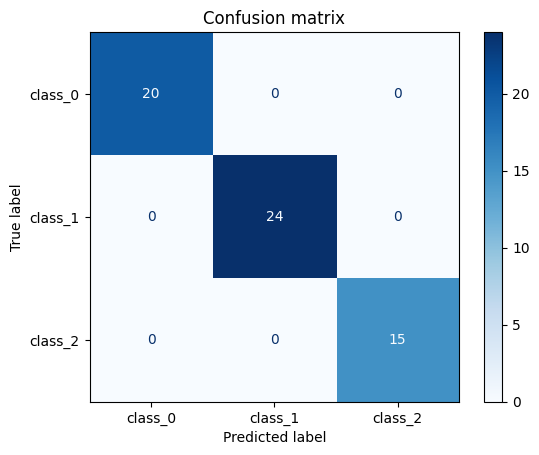

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.show()
